# Discrete Time Dynamical Systems

- Discrete-time dynamical systems describe a sequence of measurements made at equally spaced intervals

- Continuous-time dynamical systems, usually known as differential equations, describe measurements that are collected continuously

- A discrete-time dynamical system consists of an initial value and a rule that transforms the system from the present state to a state one step into the future.


- Assume $m_t$ is the measurement of some quantity at time $t$. 
- The relationship between $m_t$ and the next measurement, $m_{t+1}$ is described by a function called the updating function: $m_{t+1}=f(m_t)$
- More generally, an updating function could depend on some number of previous values, $m_{t+1}=f(m_t,m_{t-1}, m_{t-s})$, for some value $s$ (think about the fibonacci sequence!). 


## Solutions

- Given an *initial value* $m_0$ the **solution set** of the dynamical system is the set of values $\{m_0, m_1, m_2,\ldots\}$ where $m_{t+1}=f(m_1)$. 

- the solution of a DTDS is sometimes expressed as a function $m_t=g(t)$. It is not always possible or easy to find an explicit solution. 

- The **graph** of a DTDS is the set of points $\{(t, m_t), t=0,1,2,3\ldots\}$. 

- There are techniques for obtaining the graph of the solution set without explicitly finding a solution. 

### Examples

#### Basic Exponential discrete time dynamical system

- for an initial value $m_0$ consider the updating function $(m_t)=rm_t$ where $r>0$ is some parameter (that we choose). 
- then: 
$$m_1=f(m_0)=m_0r$$
$$m_2=f(m_1)=m_1r=m_0r^2$$
$$m_3=f(m_2)=m_2r=m_0r^3$$... ad infinitum 
- **In general, $m_t=m_0r^t$ <- THE SOLUTION** 

[3, 6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288, 24576, 49152, 98304, 196608, 393216, 786432, 1572864, 3145728]


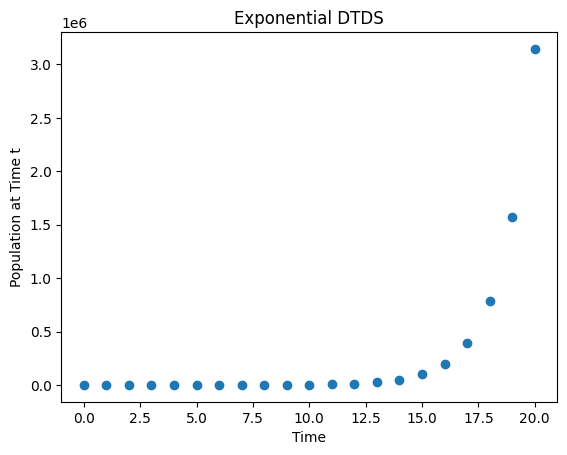

In [5]:
#example of an exponential model 
import numpy as np
import matplotlib.pyplot as plt

#for example, this could model the number of bacteria
# in a sample that double every day, and m_t is the 
#population at the start of each day

r=2 #growth rate
m0=3 #initial population of bacteria 

def exponential_update(x,rate): # updating function
    return rate*x

terminal_time=20 #number of time steps
values=[m0] #initial value
for i in range(terminal_time):
    values.append(exponential_update(values[i],r)) #append new values 
    
plt.scatter(list(range(terminal_time+1)),values)
plt.title("Exponential DTDS")
plt.xlabel("Time")
plt.ylabel("Population at Time t")
print(values)

### Basic Additive DTDS
- given an initial measurment $h_0$, an additive updating function with parameter $a$ is one such that $f(h_t)=h_t+a$. 
- given $h_0$, we have
$$h_1=f(h_0)=h_0+a$$
$$h_2=f(h_1)=h_1+a=h_0+2a$$
$$h_3=f(h_2)=h_2+a=h_0+3a$$
... ad infinitum
- in general $h_t=h_0+ta$, i.e. linear with slope $a$.

Text(0, 0.5, 'Population at Time t')

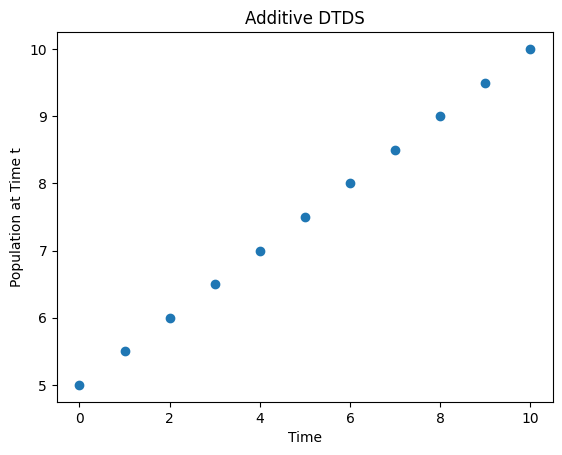

In [6]:
a=0.5 #slope
m0=5 #initial value

def additive_update(x,slope=a):
    return x+a

terminal_time=10
values=[m0]
for i in range(terminal_time):
    values.append(additive_update(values[i]))
    
plt.scatter(list(range(terminal_time+1)),values)
plt.title("Additive DTDS")
plt.xlabel("Time")
plt.ylabel("Population at Time t")

# Cobwebbing
- Cobwebbing is a graphical technique used to determine the behaviour of solutions to a DTDS without calculations.

- This technique allows us to sketch the graph of the solution (a set of discrete points) directly from the graph of the updating function.

### Cobwebbing Algorithm

1. Graph the updating function and the diagonal (i.e. graph $y=f(t)$ and $y=t$).
2. Plot the initial value $m_0$ on the horizontal axis. From this point, move vertically to the updating function to obtain the next value of the measurement. The coordinates of this point are $(m_0,m_1)$.
3. Move horizontally to the point $(m_1,m_1)$ on the diagonal. Plot the value $m_1$ on the horizontal axis. This is the next value of the solution.
4. Fromthepoint $(m_1,m_1)$ on the diagonal, move vertically to the updating function to obtain the point $(m_1,m_2)$ and then horizontally to the point $(m_2,m_2)$ on the diagonal. Plot the point $m_2$ on the horizontal axis.
5. Continue alternating (or “cobwebbing”) between the updating function and the diagonal to obtain a set of solution points plotted along the horizontal axis.

In [7]:
#Let's try to cobweb the basic exponential model. 

r=2 #doubling
m0=3 #initial population of bacteria 

def exponential_update(x,rate=r):
    return r*x

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict


def plot_cobweb(f, m_0, steps): #function to cobweb
    
    cobwebs_x=[m_0] #starting x-value
    cobwebs_y=[f(m_0)] #starting y-value
    
    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_x.append(cobwebs_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_y.append(cobwebs_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_x.append(cobwebs_y[i-1]) #append the same x-value, but "move up" to the updating curve. 
            cobwebs_y.append(f(cobwebs_x[i]))
            
            
    xvalues=np.linspace(0,max(cobwebs_x), 500) #linspace for plotting
    plt.title("Cobweb Plot")
    plt.plot(xvalues,xvalues, label="y=x") #plot the diagonal y=x
    plt.plot(xvalues, f(xvalues), label="updating function") #plot the updating function
            
    plt.plot(cobwebs_x,cobwebs_y) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_x),2)),list(np.around(np.array(cobwebs_y),2))): #add some labels
        label = f"({x},{y})"
        #uncomment the following code to see point labels. It gets too messy with a lot of steps
        #plt.annotate(label, # this is the text
                    #(x,y), # these are the coordinates to position the label
                     #textcoords="offset points", # how to position the text
                     #xytext=(0,10), # distance from text to points (x,y)
                     #ha='center') # horizontal alignment can be left, right or center
    plt.legend()
    plt.draw()  
    
    plt.figure() 
    
    
    
    
    distinct_solutions=list(OrderedDict.fromkeys(cobwebs_x))#get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats
    plt.title("Plot of the Cobweb x-coordinates")
    plt.plot(list(range(len(distinct_solutions))),distinct_solutions) #plots the solution set. 
    plt.draw()

    plt.show()

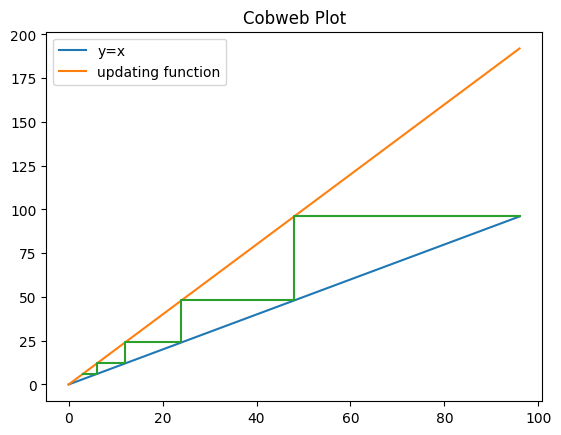

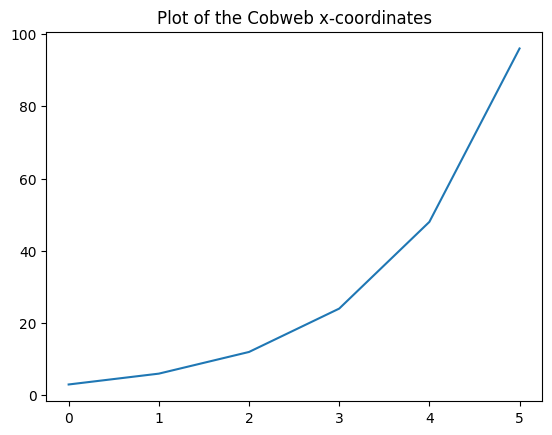

In [8]:
plot_cobweb(exponential_update, 3,10)

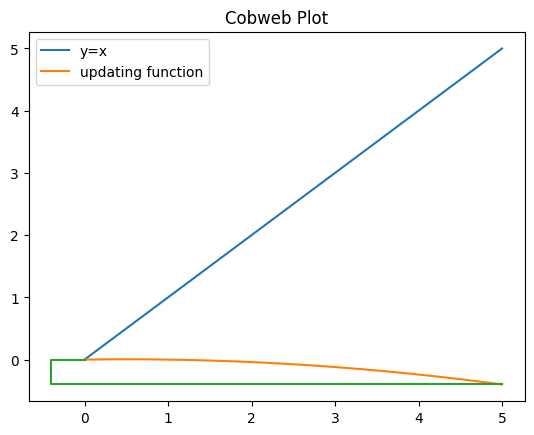

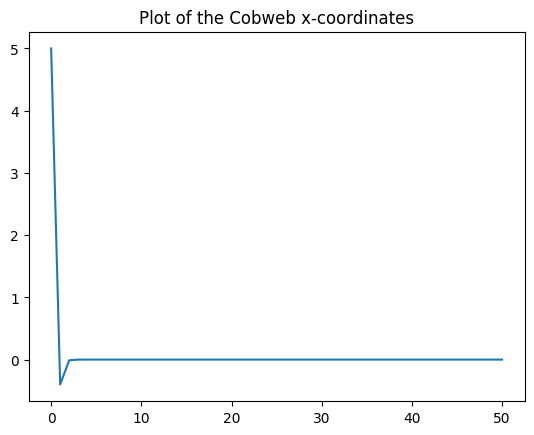

In [9]:
#example: logistic growth 
r=0.02
def logistic_update(x,rate=r):
    return r*x*(1-x)

plot_cobweb(logistic_update,5,100)
    

## Example: A Discrete-Time Dynamical System for Absorption of Pain Medication

A patient is on methadone, a medication used to relieve chronic, severe pain (for instance, after certain types of surgery). It is known that every day, the patient’s body absorbs half of the methadone. In order to maintain an appropriate level of the drug, a new dosage containing 1 unit of methadone is administered at the end of each day.

1. Write a DTDS to model the dynamics of methadone in a patient’s body.
$$m_{t+1}= \frac{m_t}{2}+1$$ 

2. Identify and graph the updating function.
- the updating function is linear with slope 1/2
3. Starting from an initial amount $m_0= 1$, calculate the amount of methadone in a patient’s body over the next 4 days. Plot these solution points.
4. Starting from an initial amount $m_0= 5$, calculate the amount of methadone in a patient’s body over the next 4 days. Plot these solution points.
5. Starting either from $m_0= 1$ or $m_0= 5$, what do you think will happen to the amount of methadone present in a patient’s body over a longer time period?
6. Draw cobwebs for $m_0=1,5,2$. Describe what your cobweb diagram tells you about the dynamics of methadone in each case.

Fill in the solutions to these as an exercise. 

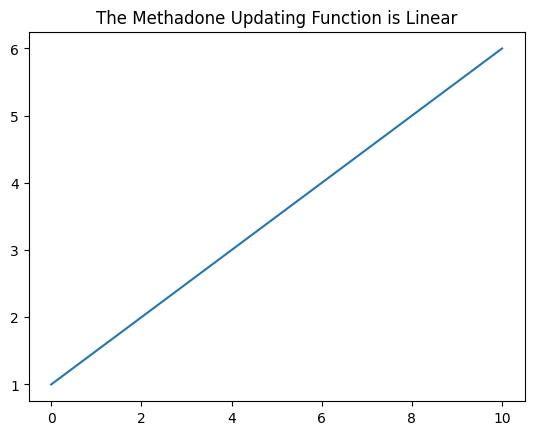

In [10]:
#2 
def methadone_update(x):
    return (0.5)*x+1

x_values=np.linspace(0,10,500)
plt.title("The Methadone Updating Function is Linear")
plt.plot(x_values, methadone_update(x_values))

Text(0, 0.5, 'Population at Time t')

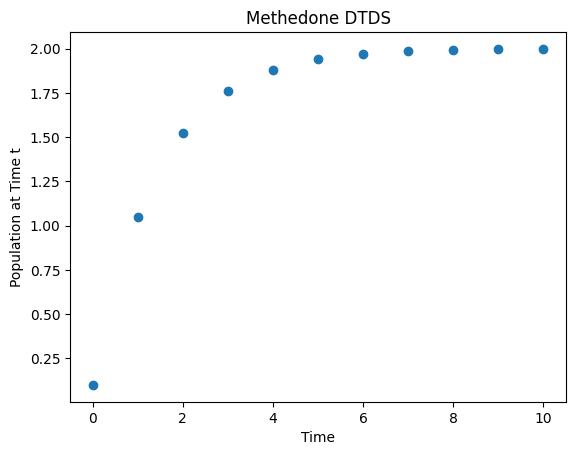

In [11]:
#3 
m0=0.1 #initial dose of Methedone

terminal_time=10
values=[m0]
for i in range(terminal_time):
    values.append(methadone_update(values[i]))
    
plt.scatter(list(range(terminal_time+1)),values)
plt.title("Methedone DTDS")
plt.xlabel("Time")
plt.ylabel("Population at Time t")


## Equilibria

**Definition:** A point $m^*$ is called an equilibrium of the DTDS $$m_{t+1} = f (m_t )$$ iff $f(m*) = m*.$ In otherwords, a point equilibria is a fixed point of the updating function. 
- Geometrically, the equilibria correspond to points where the updating function intersects the diagonal.
- Equilibria are ``steady states'' of the dynamical system. 
- Example: in the Methedone DTDS we can see that m_0=2 is a equilibrium


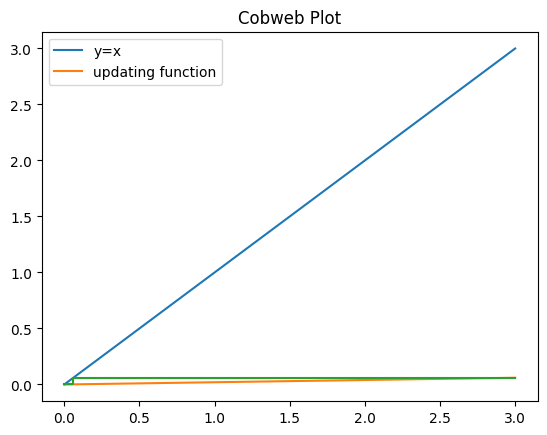

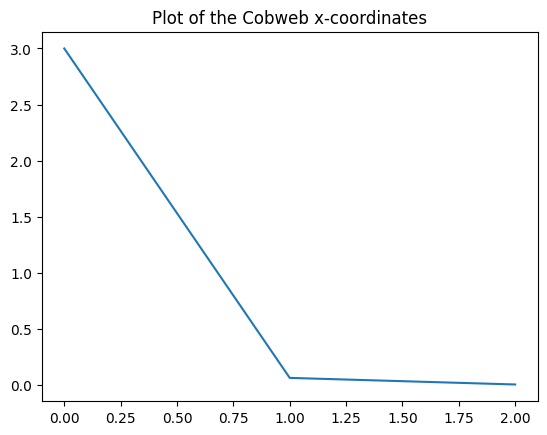

In [12]:
#equilibrium in exponential model: 

plot_cobweb(exponential_update, 3, 5)

#clearly there is a equilibrium at $m^*=0$ and nowhere else

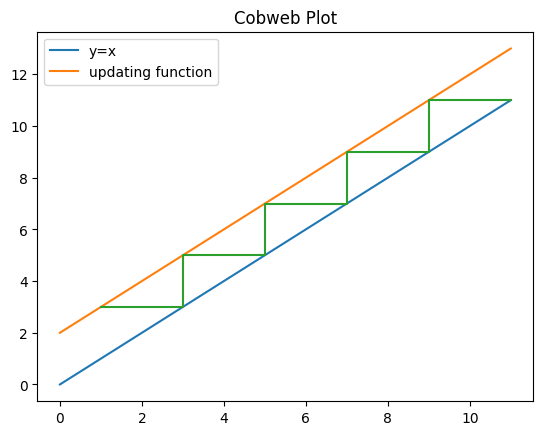

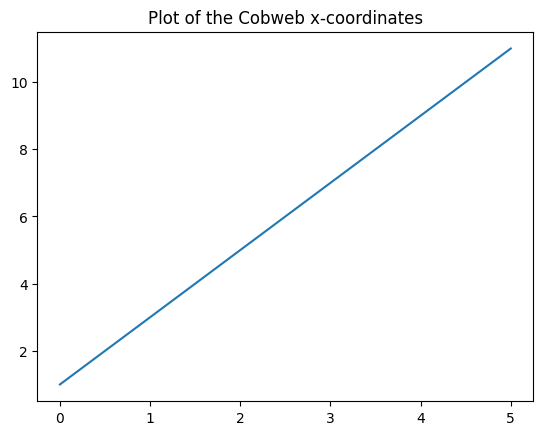

In [13]:
#simple additive model: 




a=2 #slope
m0=1 #initial value

def additive_update(x,slope=a):
    return x+a

plot_cobweb(additive_update, m0, 10)

#there are no equilibria! UNLESS a=0, in which case every point is an equilibria 


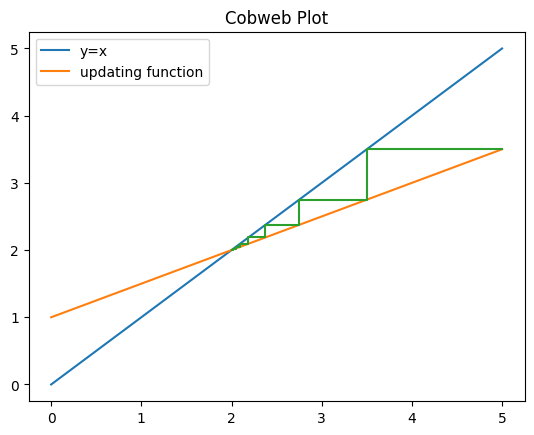

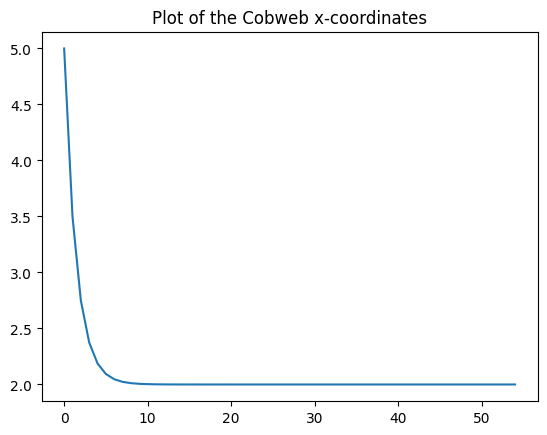

In [14]:
#Equilibrium for Methedone example

plot_cobweb(methadone_update, 5,200)



## Solving for Equilibria

- Sometimes, we can solve for equilibria algebraically by solving the equation $$m^*=f(m^*)$$

- Example: let's find the equilibrium for our Methadone example algebraically: 
$$m^*=\frac{1}{2}m^*+1$$
- So 
$$m^*-\frac{1}{2}m^*=1$$
$$\frac{1}{2}m^*=1,$$
hence, 
$$m^*=2.$$

#### EXAMPLES/Exercises

1. $c_{t+1}=0.87c_t+d$ where $d$ is a parameter
2. $x_{t+1}=\frac{ax_t}{1+x_t}$ where $a$ is a parameter. 

# Stability of Equilibria

- An equilibrium is ***stable*** if solutions that start near the equilibrium move closer to the equilibrium.

- An equilibrium is ***unstable*** if solutions that start near the equilibrium move away from the equilibrium.

### Example: 

- Consider the DTDS for a population of codfish $$n_{t+1} = −0.6n_t + 5.3$$ where $n_t$ is the number of codfish in millions and $t$ is time.

- Suppose that initially there are 1 million codfish. Determine the equilibria and the behaviour of the population over time by cobwebbing.

- **Exercise:** solve for $n^*$ algebraically.

In [15]:
#code

def cod_update(x): #cod updating function
    return -0.6*x+5.3



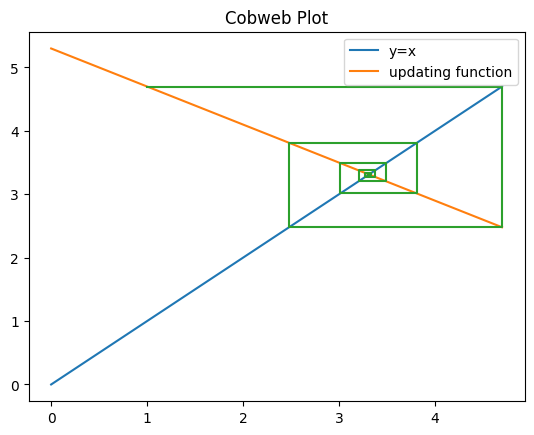

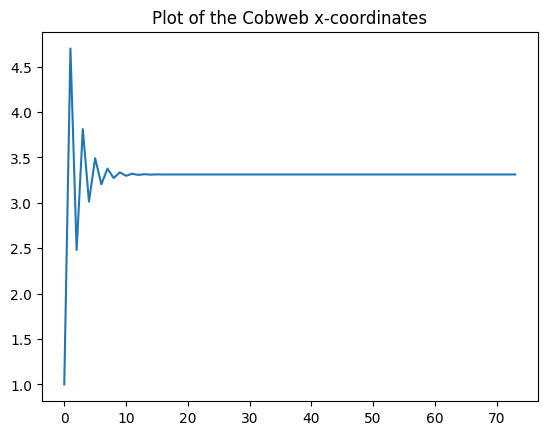

In [16]:
plot_cobweb(cod_update, 1, 200)

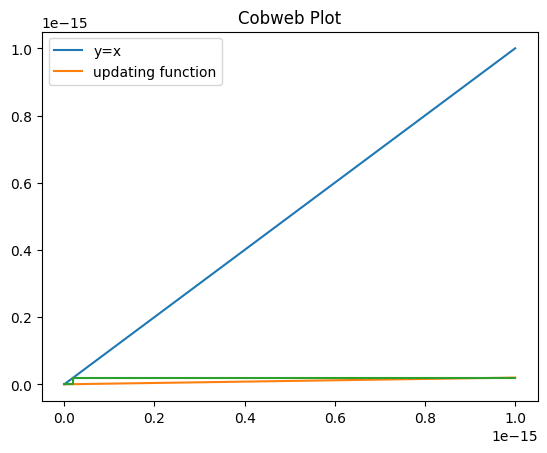

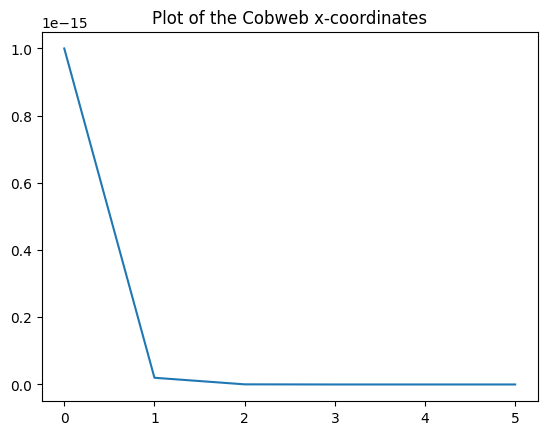

In [17]:
plot_cobweb(exponential_update, 0.000000000000001,10)

# Modelling with DTDSs

- Recall earlier the simple exponential DTDS with parameter $r>0$: $$b_t=rb_{t-1}$$
- the general solution is expoential $b_t=b_0r^t$
- for small time measurements, one can model population growth with this model (say, for bacteria) but this model is not realistic in the long term. 
- Our assumtion is that the rate of growth, $r$, is constant, but constant exponential growth is not a realistic model of population over time. 
- Reality: r will depend on the size of the population (resources are limited)!
- small populations ⇒ less competition ⇒ bigger value of r
- big populations ⇒ more competition ⇒ smaller value of r
- More sophisticated model: replace constant $r$ with a function $r(b_t)$ which decreases as $b_t$ increases. 
- example: $r(b_t)=\frac{k}{b_t}$ for some constant $k$.
- example: $f(b_t)=\frac{C}{1+kb_t}$ for constants $k, C$, etc. 
- Let's code a bit to see the behaviour...


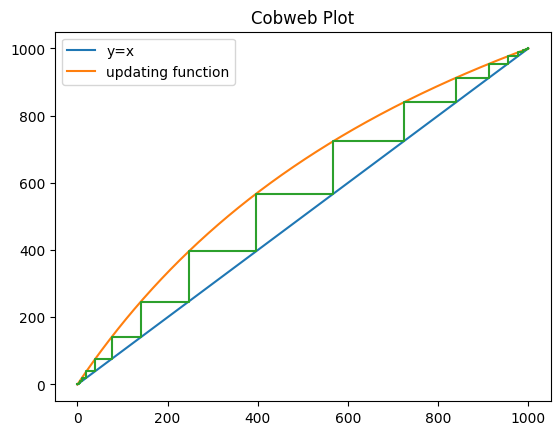

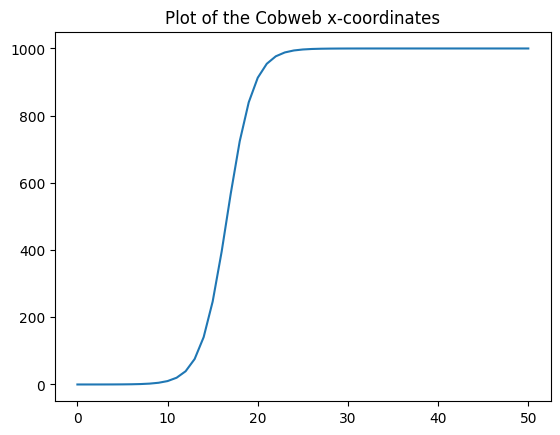

In [18]:
#Model for Limited Population growth. 

def growth_rate(x, C, k): #growth rate r(b_t), C and k are parameters
    return C/(1+k*x)

#constants
C=2
k=0.001

def limited_pop_update(x): #update function for the limited population growth model
    return growth_rate(x,C,k)*x #so this looks exponential with a variable growth rate

plot_cobweb(limited_pop_update,0.01, 100)
#it looks like in this model, as in the methedone example, we have a stable equilibrium

#we have TWO equilibria: b_0=0 is an UNSTABLE EQUILIBRIUM
#the other equilibrium is STABLE

## Substance Absorption (Elimination) and Replacement (Consumption) Models
Let's look at a model of elimination of some substance from the body. 
Let $m_t$ be the amount of some substance in the body at time $t$. Consider the DTDS given by $$m_{t+1}=m_t-r(m_t)m_t + d$$
where: 
- $m_{t+1}$ is the amount of substance in the body at time $t$
- $r(m_t)$ is the elimination rate as a function of $m_t$ (so the $-r(m_t)m_t$ term is the amount of the substance eliminated from the body at time $t$, 
- $d$ is the dosage or the amount of the substance taken at time $t+1$ (for example, in the methedone example our patient was being given a dose of 1 unit at the end of each day). 

### Example: Absorption of Caffeine 
- Filtration by our kidneys breaks down caffeine at a constant rate of13% per hour.
- DTDS: $c_{t+1} = c_t-0.13c_t +d$ where $d$ is the amount of caffeine we drink at hour $t+1$ (a more realistic model might make this non-constant).  


### Example: Elimination of Alcohol
- The amount of alcohol that is broken down using enzymes from the liver depends on the amount of alcohol present in the body. *The larger the amount, the smaller the proportion of alcohol being eliminated.*
- This is similar to the limited population growth model.
- If $a_t$ is the alcohol in your body (in grams) at time $t$, then 
$$a_{t+1}=a_t-r(a_t)a_t+d$$
where
- $r(a_t)$ is the rate of elimination/absorption 
- $d$ is the new alchol consumed per hour (in grams)
- Let's experiment with a model where $$r(a_t)=\frac{10.1}{4.2+a_t}$$ (not necessarily realistic)

Text(0, 0.5, 'Elimination Rate')

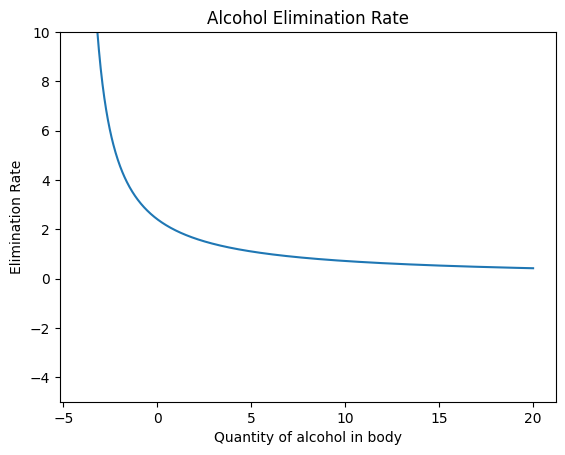

In [19]:
x_axis=np.linspace(-4,20,1000)

def alcohol_elimination_rate(x): #alcohol elimination rate r(a_t)
    return (10.1)/(4.2+x)

plt.ylim(-5,10)
plt.plot(x_axis, alcohol_elimination_rate(x_axis))
plt.title("Alcohol Elimination Rate")
plt.xlabel("Quantity of alcohol in body")
plt.ylabel("Elimination Rate")

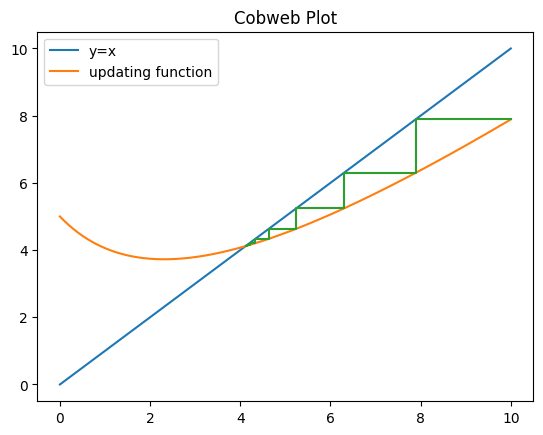

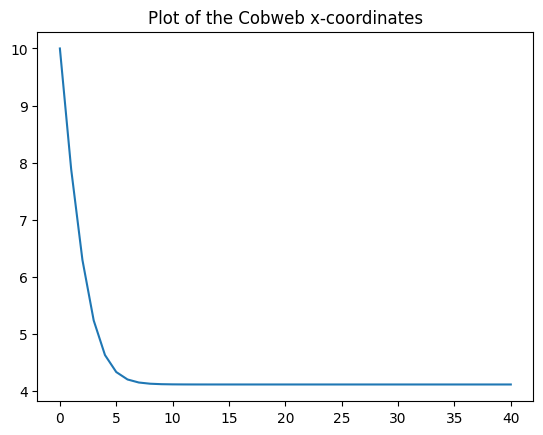

In [20]:
def alc_elim_update(x,d=5): #update function for the alcohol elimination model
    return x-alcohol_elimination_rate(x)*x+d

plot_cobweb(alc_elim_update,10,100) #initial value of 10 and 100 cobweb steps


### Exercises

1. For what value(s) of $d$ does the DTDS for alcohol consumption and elimination have a biologically plausible equilibrium?

2. If there are 50 g of alcohol in the body and no newalcohol is consumed, how long will it take for the alcohol level to fall below 1 g?

In [21]:
def funny_update(x):
    return x**xx

In [22]:
plot_cobweb(funny_update, np.sqrt(2), 100)

NameError: name 'xx' is not defined

In [ ]:
def inverse(x):
    return (x-1)/(1-0.2)

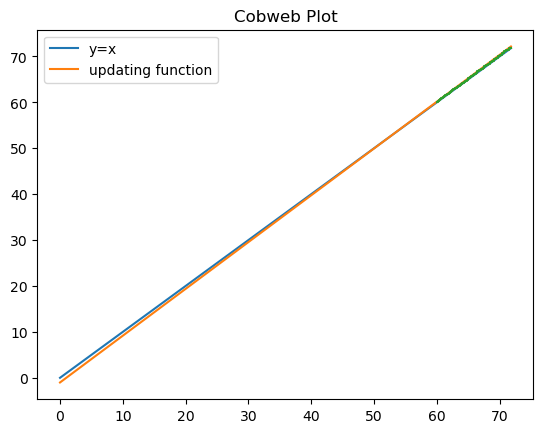

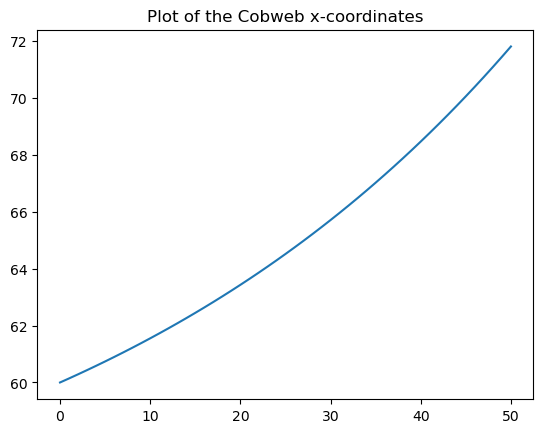

In [ ]:
plot_cobweb(inverse, 60, 100)

In [ ]:
def plot_cobweb(f, m_0, steps): #function to cobweb
    
    cobwebs_x=[m_0] #starting x-value
    cobwebs_y=[f(m_0)] #starting y-value
    
    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_x.append(cobwebs_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_y.append(cobwebs_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_x.append(cobwebs_y[i-1]) #append the same x-value, but "move up" to the updating curve. 
            cobwebs_y.append(f(cobwebs_x[i]))
            
            
    xvalues=np.linspace(-20,max(cobwebs_x), 500) #linspace for plotting
    plt.title("Cobweb Plot")
    plt.plot(xvalues,xvalues, label="y=x") #plot the diagonal y=x
    plt.plot(xvalues, f(xvalues), label="updating function") #plot the updating function
            
    plt.plot(cobwebs_x,cobwebs_y) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_x),2)),list(np.around(np.array(cobwebs_y),2))): #add some labels
        label = f"({x},{y})"
        #uncomment the following code to see point labels. It gets too messy with a lot of steps
        #plt.annotate(label, # this is the text
                    #(x,y), # these are the coordinates to position the label
                     #textcoords="offset points", # how to position the text
                     #xytext=(0,10), # distance from text to points (x,y)
                     #ha='center') # horizontal alignment can be left, right or center
    plt.legend()
    plt.draw()  
    
    plt.figure() 
    
    
    
    
    distinct_solutions=list(OrderedDict.fromkeys(cobwebs_x))#get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats
    plt.title("Plot of the Cobweb x-coordinates")
    plt.plot(list(range(len(distinct_solutions))),distinct_solutions) #plots the solution set. 
    plt.draw()

    plt.show()

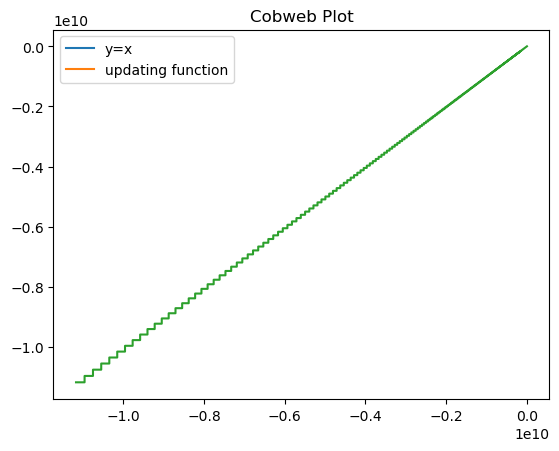

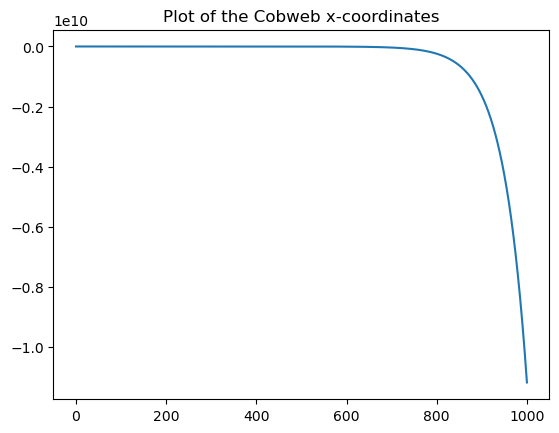

In [ ]:
plot_cobweb(inverse, 0, 2000)